## Aplicatii ale descompunerii SVD la compresia imaginii

#### Factorizarea SVD a unei matrici

Pentru orice matrice $A\in\mathbb{R}^{m\times n}$ de rang $r\leq
\min(m,n)$ exista doua matrici ortogonale $U\in\mathbb{R}^{m\times m}$,
$V\in\mathbb{R}^{n\times n}$si numerele reale pozitive $\sigma_1\geq
\sigma_2\geq\cdots\geq \sigma_r$ astfel incat $A$ se descompune in
produsul $A=U\Sigma V^T$, adica: 

$$\underbrace{A}_{m\times n}=\underbrace{U}_{m\times m}\underbrace{\left[\begin{array}{ccccccc}
\sigma_1&0&\ldots&
0&0&\ldots&0\\
0&\sigma_2&\ldots&0&0&\ldots&0\\
\vdots&\vdots&\ldots&\vdots&\vdots&\ldots&\vdots\\
0&0&\ldots&\sigma_r&0&\ldots&0\\
0&0&\ldots&0&0&\ldots& 0\\
\vdots&\vdots&\ldots&\vdots&\vdots&\ldots&\vdots\\
0&0&\ldots&0&0&\ldots&0 \end{array}\right]}_{m\times n}\underbrace{V^T}_{n\times
n}$$

Aceasta descompunere se numeste descompunerea SVD a matricii $A$, iar $\sigma_1, \ldots, \sigma_r$, valorile singulare ale matricii $A$.

Notand cu $u_1, u_2, \ldots, u_m$ coloanele matricii $U$ si respectiv cu $v_1, v_2, \ldots, v_n$, coloanele matricii $V$,
descompunerea SVD  se exprima ca o combinatie liniara cu coeficientii $\sigma_i$ a matricilor de rang $1$,
$u_i v_i^T$, $i=\overline{1,r}$:
    
  $$A=U\Sigma V^T=\sigma_1 u_1v_1^T+\sigma_2 u_2 v_2^T+\cdots+\sigma_r u_r v_r^T$$  

Daca  sirul valorilor singulare:
    
$\sigma_1\geq \sigma_2\geq \cdots \geq \sigma_r>0$.

este rapid descrescator, adica incepand de la un anumit rang $k$, valorile $\sigma_{k+1}, \ldots, \sigma_r$ 
sunt foarte mici comparativ cu primele valori, atunci primii $k$ termeni din descompunerea SVD permit reconstructia matricii $A$. Mai precis, din primii $k$ termeni construim  o aproximatie a matricii $A$:
$$A_k=\sigma_1(u_1v_1^T)+\cdots+\sigma_k(u_kv_k^T)$$

Matricea aproximare, $A_k$,  factorizeaza astfel:

$$A_k =\underbrace{[u_1|u_2|\ldots|u_k]}_{m\times k} \underbrace{\left[\begin{array}{cccc} \sigma_1&0&\ldots&0\\
0&\sigma_2&\ldots&0\\
\vdots&\vdots&\ldots&\vdots\\
0&0&\ldots&\sigma_k\end{array}\right]}_{k\times k}\underbrace{\left[\begin{array}{c} v_1^T\\
v_2^T\\\vdots\\v_k^T\end{array}\right]}_{k\times n}$$

si deci are rangul  $k$.

Conform Teoremei Eckart-Young matricea  $A_k$ este cea mai buna aproximatie de rang $k$ a matricii $A$, adica dintre toate matricile $B\in\mathbb{R}^{m\times n}$ de rang $k$, distanta de la $A$ la $B$ este minimizata de $A_k$:

$$||A-A_k||_F\leq ||A-B||_F, \quad \forall\:\: B$$

Precizare:  Daca $M=(m_{ij})\in\mathbb{R}^{m\times n}$, atunci $||M||_F=\sqrt{\sum_{i,j}m_{ij}^2}$  noteaza  norma Frobenius a matricii $M$.

Eroarea aproximarii lui $A$ prin $A_k$ este $Er=||A-A_k||_F=\sqrt{\sigma_{k+1}^2+\cdots+\sigma_r^2}$.

#### Calculul factorilor din descompunerea SVD  in  `Python`

Declarand matricea $A\in\mathbb{R}^{m\times n}$ ca un `numpy.array`, functia `numpy.linalg.svd` apelata astfel:
    
  `[U,s, Vt]=numpy.linalg.svd(A)` sau `U, s, Vt=numpy.linalg.svd(A)`
    
calculeaza elementele descompunerii SVD a matricii $A$.  `U` si `Vt` sunt array-uri 2D, reprezentand matricile
$U$ si $V^T$ din formula teoretica $A=U\Sigma V^T$, iar `s` este un array 1D (un vector) ce contine $\min{(m,n)}$ elemente `s`=$[\sigma_0,\sigma_1, \ldots, \sigma_{r-1}, 0, \ldots, 0]$, adica valorile singulare in ordine descrescatoare completate cu zerouri, daca este cazul, pana la $\min{(m,n)}$ elemente.

Numarul valorilor singulare este egal cu rangul matricii $A$.

In [2]:
import numpy as np
A=np.array([1,2,3,4,5, 2, 3, 4, 5,6,  4,6,8,10, 12, 6,9,12,15,18], float).reshape((4,5))
print 'A=\n', A
[U,s,Vt]= np.linalg.svd(A)
print '\nValorile singulare ale matricii A sunt elementele nenule ale vectorului:\n', s.round(3)
print '\n U=\n', U.round(3), '\n V=\n', Vt.round(3)

A=
[[  1.   2.   3.   4.   5.]
 [  2.   3.   4.   5.   6.]
 [  4.   6.   8.  10.  12.]
 [  6.   9.  12.  15.  18.]]

Valorile singulare ale matricii A sunt elementele nenule ale vectorului:
[ 36.256   0.73    0.      0.   ]

 U=
[[-0.204 -0.979  0.     0.   ]
 [-0.262  0.054 -0.411 -0.872]
 [-0.523  0.109 -0.689  0.489]
 [-0.785  0.163  0.597 -0.035]] 
 V=
[[-0.208 -0.314 -0.421 -0.528 -0.634]
 [ 0.746  0.449  0.151 -0.147 -0.445]
 [ 0.613 -0.747 -0.116  0.023  0.228]
 [-0.102 -0.288  0.293  0.688 -0.59 ]
 [ 0.118  0.242 -0.837  0.476  0.001]]


#### Reconstructia matricii $A$ din factorii SVD, $U$, $\Sigma$, $V^T$

Pentru a genera din vectorul valorilor singulare $s$, matricea $\Sigma$, care are acelasi 
shape ca matricea $A$, se identifica numarul valorilor singulare (rangul matricii A):

In [3]:
r = np.sum(s > 1e-7)
print 'Rangul matricii r=',r

Rangul matricii r= 2


Testul `s>1e-7` returneaza un vector de booleeni, avand acelasi nr de elemente ca `s`:

In [4]:
b=s>1e-7
print b
print np.sum(b)

[ True  True False False]
2


Cu alte cuvinte, `b[i]=True`, daca `s[i]>1e-7` si `b[i]=False`, in caz contrar, $i=\overline{0,len(s)-1}$

Matricea $\Sigma$ se constituie din vectorul `s` astfel:

In [5]:
Sigma=np.zeros(A.shape)
Sigma[:r,:r]= np.diag(s[:r])
print Sigma

[[ 36.25558529   0.           0.           0.           0.        ]
 [  0.           0.72974999   0.           0.           0.        ]
 [  0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.        ]]


Linia `Sigma[:r,:r]= np.diag(s[:r])` atribuie sublocului matricii `Sigma` format din primele $r$ linii si $r$ coloane,
matricea diagonala generata din vectorul `s[:r]`, adica din vectorul ce contine valorile singulare.

Produsul celor trei matrici din descompunerea SVD, comparat cu matricea $A$:

In [6]:
P=np.dot(U, np.dot(Sigma, Vt))
print 'P=\n', P, '\n A=\n', A
         

P=
[[  1.   2.   3.   4.   5.]
 [  2.   3.   4.   5.   6.]
 [  4.   6.   8.  10.  12.]
 [  6.   9.  12.  15.  18.]] 
 A=
[[  1.   2.   3.   4.   5.]
 [  2.   3.   4.   5.   6.]
 [  4.   6.   8.  10.  12.]
 [  6.   9.  12.  15.  18.]]


#### Compresia imaginilor

O imagine in tonuri de gri este reprezentata de o matrice $A=(a_{ij})$. Elementul  $a_{ij}$
al matricii este codul  $c\in\{0,1,2,\ldots,255\}$, al nivelului de gri al pixelului din linia $i$, coloana $j$.  

O imagine color poate fi reprezentata de 3 matrici $R$, $G$, $B$, de aceeasi rezolutie $m\times n$
si in pozitia $(i,j)$ a fiecarei matrici este stocata respectiv "cantitatea" de `red`, `green`, `blue`, (r, g, b), din care este sintetizata culoarea pixelului din pozitia $(i,j)$ a imaginii.
$r, g, b\in\{0,1, \ldots, 255\}$  (pentru a gasi tripletul (r,g,b) ce genereaza o culoare sau pentru a afisa culoarea dintr-un triplet dat se pot folosi [instrumentele de aici](http://www.rapidtables.com/web/color/RGB_Color.htm)).

Imaginile in tonuri de gri si cele color, in format `png`, sunt citite de functia `plt.imread` in matrici ale caror elemente  sunt numere de tip `float` din intervalul $[0,1]$ (codurile de culoare, $c$, sunt scalate la $c/255.0\in[0,1]$).

Compresia unei imagini digitale consta in   reducerea volumului de date necesare pentru a reprezenta  imaginea. 

Descompunerea SVD a matricii reprezentative a unei imagini in tonuri de gri ofera un instrument de comprimare a imaginii.

Si anume,  determinand descompunerea SVD a matricii,
$A=\sum_{i=1}^r\sigma_i u_i v_i^T$, si renuntand la termenii ce
au coeficientii $\sigma_{k+1}, \ldots, \sigma_r$ suficient de mici
in comparatie cu $\sigma_1, \sigma_2,\ldots, \sigma_k$, obtinem o
aproximare $A_k$ a imaginii $A$. 
Cu alte cuvinte imaginea  $A_k$ se obtine prin compresia imaginii $A$.
Imaginea initiala este constituita din $r$ vectori $u_i$ din $\mathbb{R}^m$, $r$ vectori $v_i$ din $\mathbb{R}^n$ si $r$ valori singulare, in timp ce pentru compresie sunt necesari $k<<r$ vectori $u_i$, respectiv $v_i$, si $k$ valori singulare.

Sa aplicam acum descompunerea SVD a unei imagini in tonuri de gri. Imaginea o selectam din cele trei imagini reprezentative
ale unei imagini color, in format `png`:

In [7]:
%matplotlib inline

Array-ul imag este un array 3D: (295L, 284L, 3L)


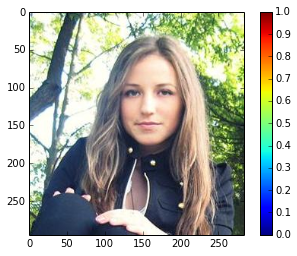

In [8]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm #matplotlib.cm contine functii pentru colormaps=palete de culori

imag=plt.imread('Imag/Iony.png')
plt.imshow(imag)
plt.colorbar()
print 'Array-ul imag este un array 3D:', imag.shape


- A se observa sistemul stramb de coordonate relativ la care este raportata imaginea. Punctul de coordonate $(0,0)$ este plasat in coltul stanga-sus.

- Imaginea color este reprezentata de un aray 3D, adica  3 array-uri 2D. Interogand `imag.shape`
deducem ca fiecare  array 2D are 295 linii si 284 coloane.
Cele trei array-uri se acceseaza respectiv, ca `imag[:,:,0]`, `imag[:,:,1]`, `imag[:,:,2]`.
In primul array un element este setat pe cantitatea de red continuta de pixelul respectiv din imaginea color,
al doilea array pe cantitatea de green si al treielea pe cantitatea de blue.


In [9]:
print 'Cantitatea de r,g,b din pixelul din linia 50, coloana 117 este:'
print imag[50][117][0],  imag[50][117][1],  imag[50][117][2]
       

Cantitatea de r,g,b din pixelul din linia 50, coloana 117 este:
0.968627 0.996078 0.862745


Afisam cele trei array-uri ca imagini in tonuri  de gri:

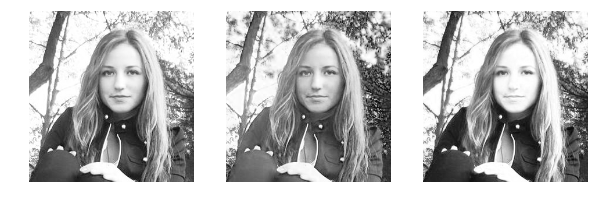

In [10]:
for i in range(3):
    plt.rcParams['figure.figsize'] = (10.0, 8.0)
    plt.subplot(1,3,i)
    plt.axis('off')
    plt.imshow(imag[:,:,i],cmap=cm.Greys_r)


Copiem array-ul `imag[:,:,0]` ce contine  cantitatile de red din imaginea initiala, in array-ul A caruia  ii aplicam descompunerea SVD:

Calculam descompunerea SVD a matricii A!
Rangul matricii imagine, A, este 284


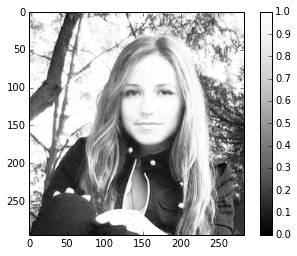

In [11]:
A=np.copy(imag[:,:,0])
(m,n)= A.shape  # 
plt.rcParams['figure.figsize'] = (6.0, 4.0)
plt.imshow(A,cmap=cm.Greys_r)
plt.colorbar()
print 'Calculam descompunerea SVD a matricii A!'
U, sig, Vt=np.linalg.svd(A)
r=np.sum(sig > 1e-7)
print 'Rangul matricii imagine, A, este', r 



Sa ilustram nivelul de marime al valorilor singulare consecutive, vizualizand punctele de coordonate
`(i, sig[i])`, $i=\overline{0,r-1}$:

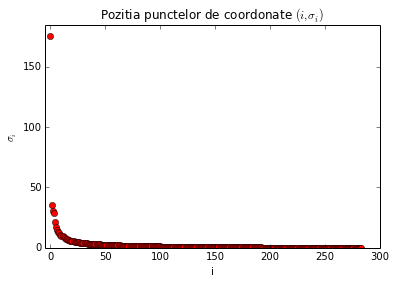

In [12]:
plt.xlabel('i')
plt.ylabel('$\sigma_i$')
plt.title('Pozitia punctelor de coordonate $(i,\sigma_i)$')
plt.axis([-5, 300, 0, 185])
plt.plot(sig[:r],'ro');#afisam punctele de coordonate (i, sigma[i]), i=0, r-1


Se observa din grafic o descrestere rapida a valorilor singulare.

Afisand primele 30 valori singulare si respectiv un set de valori consecutive $\sigma_{80}, \ldots, \sigma_{105}$, se observa descresterea brusca de la $\sigma_0=175.36$ la $\sigma_1=35.5$.  Incepand cu $\sigma_{105}$ valorile singulare devin subunitare, deci neglijabile.

Rezulta atunci ca orice aproximatie $A_k$ a imaginii $A$, cu $k$ putin mai mare decat $105$ conduce la o imagine ce aproximeaza imaginea initiala foarte bine, din punct de vedere vizual.

In [13]:
print sig[:30]
print sig[80:106]

[ 175.36378479   35.59114075   30.42295647   28.76046371   21.10986519
   17.16999817   15.08741283   13.297369     12.50727177   10.93869305
    9.96266842    9.4777956     8.68423367    8.31852913    7.42244625
    6.94905233    6.68992996    6.28417063    5.81884336    5.76521587
    5.57159901    5.44700861    5.08645105    4.89276314    4.7488842
    4.64252472    4.55647135    4.37601948    4.28990412    4.21909428]
[ 1.50130594  1.47353995  1.47002506  1.45281243  1.40553439  1.36904299
  1.33322191  1.31131637  1.29925621  1.2824589   1.24097013  1.233284
  1.22264838  1.20123994  1.18862128  1.17322135  1.15771306  1.14249372
  1.13208961  1.10726011  1.09955502  1.0686866   1.0379858   1.02889693
  1.01363623  0.99421901]


Functia urmatoare realizeaza compresia imaginii de rang r printr-una de rang k<<r si o afiseaza:

In [14]:
def  aproximare(k):
     Ak=np.zeros((m,n),float)
     for i in range (k):
         Ak=Ak+sig[i]*np.dot(U[:,i].reshape((m,1)), Vt[i,:].reshape((1, n))) 
     plt.imshow(Ak) # afisez imaginea aproximatie
     plt.gray()# afiseaza ca imagine in tonuri de gri 
     plt.axis('off')
         

Comprimam imaginea A, aproximand-o prin imagini de rang $k<<r$,  cu $k$ crescand progresiv. 

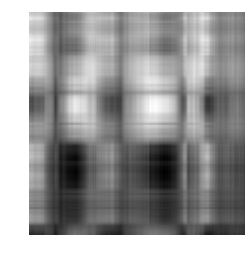

In [15]:
aproximare(2)# aproximarea printr-o imagine de rang 2

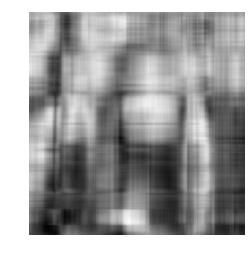

In [16]:
aproximare(5)# aproximarea printr-o imagine de rang 5

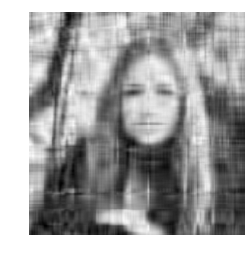

In [17]:
aproximare(10)# aproximarea printr-o imagine de rang 10

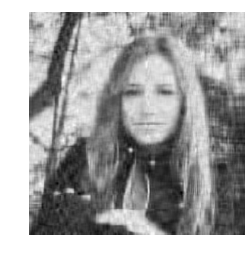

In [18]:
aproximare(20)# aproximarea printr-o imagine de rang 20

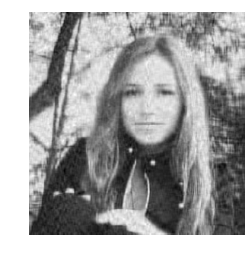

In [19]:
aproximare(30)# aproximarea printr-o imagine de rang 30

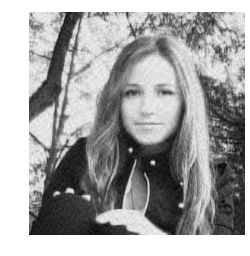

In [20]:
aproximare(55)# aproximarea printr-o imagine de rang 55

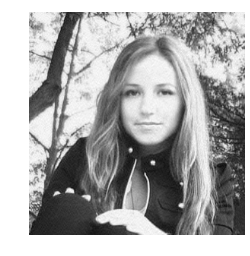

In [21]:
aproximare(105)# aproximarea printr-o imagine de rang 105

Observam ca pe masura ce se adauga mai multi termeni in descompunerea aproximativa, se amplifica informatia vizuala si imaginea $A_{105}=\sum_{k=0}^{104}\sigma_k u_k v_k^T$ nu se distinge de imaginea originala.

Teoretic, eroarea de aproximare a matricii $A$ prin $A_{105}$ este:

In [22]:
Er=np.sqrt(np.sum(sig[105:r]*sig[105:r]))#calculul vectorizat pt sqrt(sig[105]^2+...+sig[r-1]^2)
print Er

5.7949


Imaginea $A_{30}$, care este neclara, aproximeaza imaginea $A$ cu o eroare mai mare:

In [23]:
Er30=np.sqrt(np.sum(sig[30:r]*sig[30:r]))
print Er30

19.8632


Acest experiment ilustreaza ca daca o matrice imagine are doar cateva valori singulare mari 
si restul au un nivel de marime cu mult mai mic,
atunci valorile singulare neglijabile in raport cu primele sunt coeficienti ai unor termeni din descompunerea SVD, care contin zgomot sau informatie
redundanta. Acesti termeni pot fi neglijati fara pierdere de informatie.

Daca imaginea este insa in format `jpg` atunci ea este citita de `plt.imread` intr-un array cu elemente de tip
`uint8`, adica din multimea $\{0,1,2,3,\ldots, 255\}$.  In acest caz, valorile singulare sunt cu mult mai mari si e dificil
sa decidem aproximatia care conduce la eroare redusa.

Array-ul img este un array 3D: (360L, 640L, 3L)


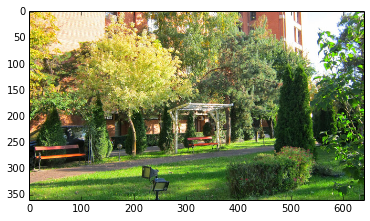

In [24]:
img=plt.imread('Imag/upt.jpg')
plt.imshow(img)
print 'Array-ul img este un array 3D:', img.shape

Calculam descompunerea SVD a matricii B!
Rangul matricii imagine, B, este 360


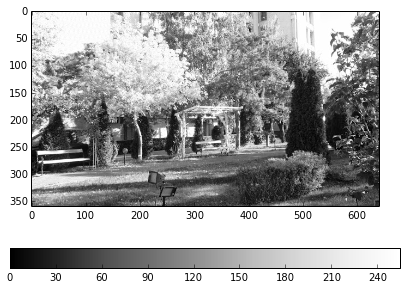

In [25]:
B=np.copy(img[:,:,0])
plt.rcParams['figure.figsize'] = (7, 5)
plt.imshow(B,cmap=cm.Greys_r)
plt.colorbar(orientation='horizontal')
print 'Calculam descompunerea SVD a matricii B!'
u, si, vt=np.linalg.svd(B)
r=np.sum(si > 1e-7)
print 'Rangul matricii imagine, B, este', r 


Observam fie din colorbar, fie afisand  tipul de date din array-ul $B$, ca $B$  are elementele in multimea $\{0,1, \ldots, 255\}$.


In [26]:
print B.dtype

uint8


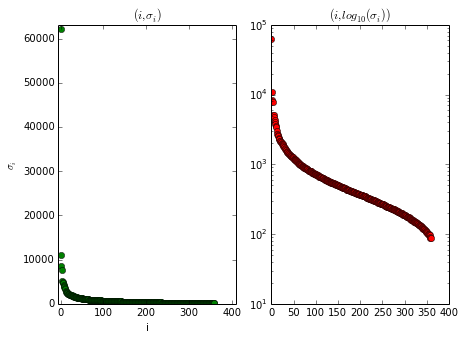

In [27]:
plt.subplot(1,2,1)
plt.xlabel('i')
plt.ylabel('$\sigma_i$')
plt.title('$(i,\sigma_i)$')
plt.axis([-5, r+50, 0, np.amax(si)+1000])
#plt.plot(np.log10(si[:r]),'ro');#afisam punctele de coordonate (i, sigma[i]), i=0, r-1
plt.plot(si[:r],'go')
plt.subplot(1,2,2)
from matplotlib import pyplot
plt.title('$(i,log_{10}(\sigma_i))$')
pyplot.yscale('log')
plt.plot(si[:r],'ro')

Din graficul din stanga, care vizualizeaza punctele $(i,\sigma_i)$ se vede ca valorile singulare sunt descrescatoare, dar nu si cat de mult descresc sub 10000.

In dreapta sunt reprezentate punctele $(i, \log_{10}(\sigma_i))$, cu scara logaritmica pe axa y.
Din aceasta se observa ca cea mai mica valoare singulara este apropiata de $10^2$.

Afisand subsiruri de valori singulare:

In [28]:
print si[:30]
print si[100:150]
print si[r-1]

[ 62134.88776663  10945.36667955   8448.9473029    7714.42442039
   5104.76906309   5023.49411872   4819.93988207   4350.46179356
   3988.00835231   3772.66602893   3532.04787894   3408.61207144
   2992.07578368   2720.38165775   2639.54445303   2512.19475751
   2420.58996992   2321.87355047   2272.31308171   2149.41490806
   2134.32370427   2085.16484767   2066.21496822   2032.96772036
   1967.30154651   1951.862649     1888.14722051   1817.11747124
   1784.2359781    1759.38226626]
[ 714.50965756  711.73923932  704.29832592  699.67687462  691.78297146
  685.19388859  681.0092869   675.45642353  663.50069375  661.65698291
  660.26750956  657.43077108  649.6638224   645.36752006  635.85031014
  634.79490912  630.31185301  626.29444077  617.74785726  614.1403806
  607.51231947  604.16131479  599.06904714  592.67911471  588.62086485
  586.82755957  581.69049696  578.87368033  574.61433605  569.43092456
  566.32334952  564.57396945  560.38749617  558.19232691  553.85359057
  547.6381593  

remarcam ca spre deosebire de exemplul precedent, in care de la un anumit rang valorile singulare erau subunitare, in acest caz al unei matrici cu elemente de 255 ori mai mari decat in cazul precedent, este dificil sa decidem care matrice $B_k$ ar fi o aproximatie buna pentru imaginea $B$. 
Sa afisam de exemplu aproximatia $B_{100}$ si sa calculam eroarea de aproximare:

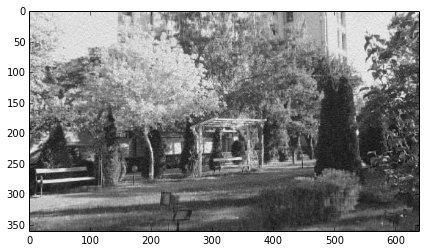

In [29]:
k=100
(m,n)=B.shape
Bk=np.zeros((m,n))
for i in range(k):
     Bk+=si[i]*np.dot(u[:,i].reshape((m,1)), vt[i,:].reshape((1, n))) 
plt.imshow(Bk) # afiseaza aproximatia
plt.gray()# afiseaza ca imagine in nivele de gri 
         

Imaginea aproximatie este vizual aproape identica cu imaginea $B$.
Eroarea de aproximare este:

In [30]:
Er=np.sqrt(np.sum(si[k:r]*si[k:r]))
print Er

6003.14503785


Aceasta situatie bizara - aproximatie vizual buna, dar eroarea teoretica  mare, se datoreaza faptului ca valorile matricii $B$ nu sunt normalizate la $[0,1]$. 

De aceea pentru a lua o decizie potrivita privind alegerea ordinului $k$ al aproximarii, care nu conduce la pierdere de informatie relevanta din imagine si nici nu pastreaza informatie redundanta, se poate proceda in doua moduri care intr-un fel sunt echivalente:

**1.**  Matricea $B$ sa fie convertita la `dtype=float` si elementele ei rescalate la elemente din $[0,1]$,
adica $B\mapsto B/255.0$ si apoi sa fie afisata imaginea $C=B/255.0$  si calculata descompunerea ei SVD si o aproximatie $C_k$ adecvata (practic asa  procedeaza functiile ce opereaza asupra   array-urilor reprezentative ale imaginilor `png`).

**2.** Pastram matricea $B$, dar pentru a decide care ordin $k$ conduce la o aproximatia buna, interpretam matricea $B$ ca fiind 
$B=255.0 C$ si deducem relatia dintre valorile singulare ale unei matrici $C$ si
ale scalatei sale $B=aC$, precum si relatia dintre eroarea $||B-B_k||_F$ si $||C-C_k||$.

Din relatia dedusa pentru erori vom observa ca putem decide mai usor care aproximatie $B_k$ este suficient
de buna.

Tema: Deduceti relatiile mentionate la **2** si experimentati intr-un Ipython Notebook ambele modalitati de compresie si analiza a erorii pentru o imagine `jpg`, ce contine poza proprie.


In [2]:
from IPython.core.display import HTML
def  css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()